In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import datasets
from sklearn.calibration import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from skmatter.decomposition import PCovC
from skmatter.decomposition._kernel_pcovc_linear import KernelPCovC
from sklearn.svm import SVC

plt.rcParams["image.cmap"] = "tab20"
plt.rcParams["scatter.edgecolors"] = "k"

random_state = 0
n_components = 2

In [3]:
from sklearn.model_selection import train_test_split

X, y = datasets.make_circles(
    noise=0.1, factor=0.7, random_state=random_state, n_samples=2000
)

## Original Data

Text(0.5, 1.0, 'Original Data')

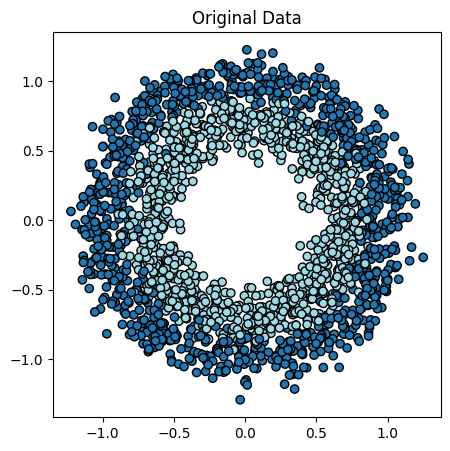

In [4]:
fig, axis = plt.subplots(figsize=(5, 5))
axis.scatter(X[:, 0], X[:, 1], c=y)
axis.set_title("Original Data")

### Scale data:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=random_state
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kernel PCA Kernel Params:{'gamma': 0.5, 'degree': 3, 'coef0': 1}
Kernel PCA Kernel Params:{'gamma': 0.5, 'degree': 6, 'coef0': 1}
Kernel PCA Kernel Params:{'gamma': 5, 'degree': 3, 'coef0': 1}
Kernel PCA Kernel Params:{'gamma': 1.0, 'degree': 3, 'coef0': 1}


/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


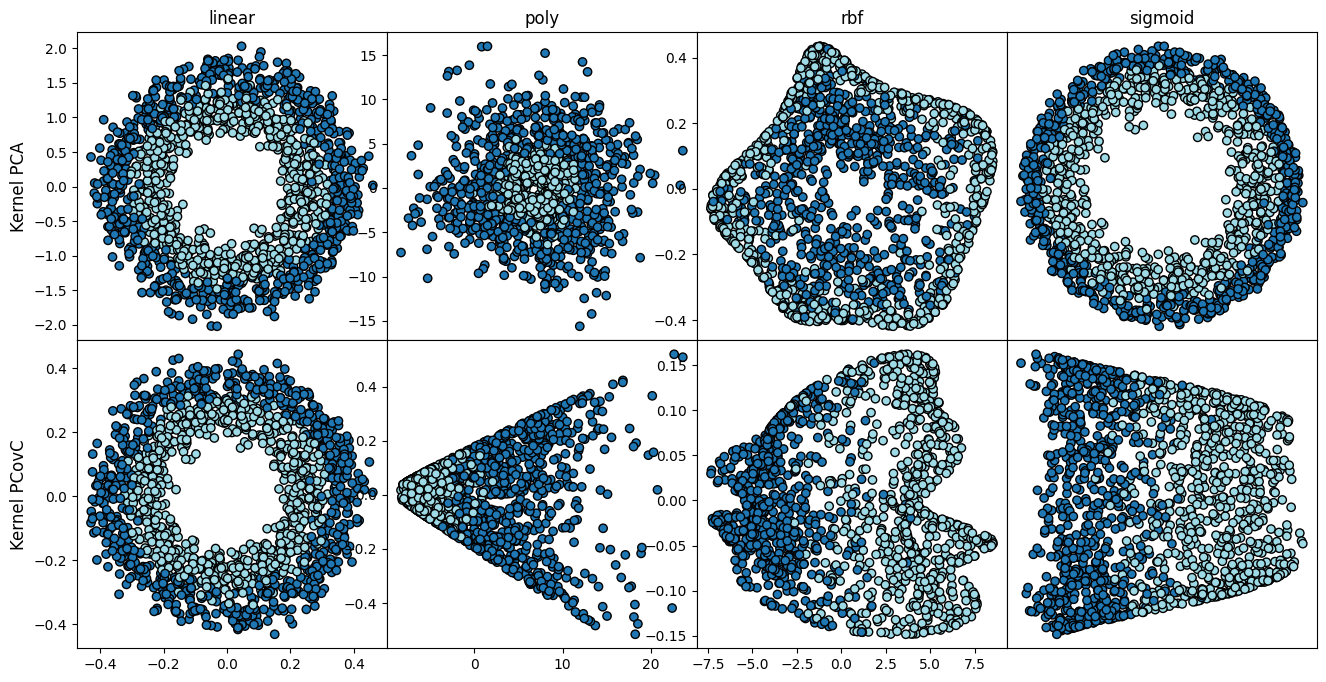

In [6]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

kernel_params = {"rbf": {"gamma": 5}, "sigmoid": {"gamma": 1.0}, "poly": {"degree": 6}}

fig, axes = plt.subplots(2, len(kernels), figsize=(len(kernels) * 4, 8))

for i, kernel in enumerate(kernels):

    kpca = KernelPCA(
        random_state=random_state,
        n_components=n_components,
        kernel=kernel,
        **kernel_params.get(kernel, {}),
    )
    t_kpca = kpca.fit_transform(X_train_scaled)

    kpcovc = KernelPCovC(
        n_components=n_components,
        mixing=0.1,
        kernel=kernel,
        random_state=random_state,
        **kernel_params.get(kernel, {}),
        center=True,
    )
    t_kpcovc = kpcovc.fit_transform(X_train_scaled, y_train)

    axes[0][i].scatter(t_kpca[:, 0], t_kpca[:, 1], c=y_train)
    axes[1][i].scatter(t_kpcovc[:, 0], t_kpcovc[:, 1], c=y_train)

    kernel_name = kernel.__name__ if callable(kernel) else kernel

    axes[0][i].set_title(kernel_name)

axes[0][i].set_xticks([])
axes[1][i].set_xticks([])

axes[0][i].set_yticks([])
axes[1][i].set_yticks([])

axes[0][0].set_ylabel("Kernel PCA", fontsize=mpl.rcParams["axes.titlesize"])
axes[1][0].set_ylabel("Kernel PCovC", fontsize=mpl.rcParams["axes.titlesize"])
fig.subplots_adjust(wspace=0, hspace=0)

## Decision Boundary

/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


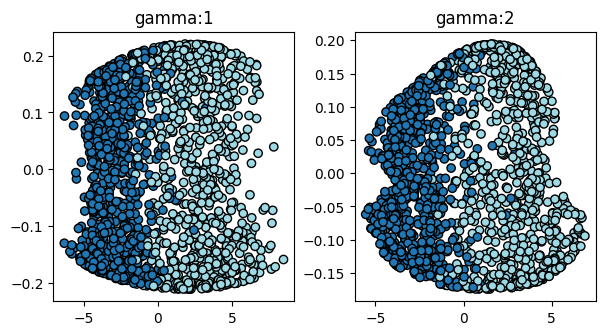

In [17]:
gamma_vals = [1, 2]

fig, axes = plt.subplots(1, len(gamma_vals), figsize=(len(gamma_vals) * 3.5, 3.5))

for i, gamma in enumerate(gamma_vals):
    kpcovc = KernelPCovC(
        classifier=LinearSVC(loss="hinge"),
        n_components=n_components,
        random_state=random_state,
        mixing=0.1,
        center=True,
        kernel="rbf",
        gamma=gamma,
    )
    t_kpcovc = kpcovc.fit_transform(X_train_scaled, y_train)

    axes[i].scatter(t_kpcovc[:, 0], t_kpcovc[:, 1], c=y_train)
    axes[i].set_title(f"gamma:{gamma}")

    # axes[i].set_xticks([])
    # axes[i].set_yticks([])

fig.subplots_adjust(wspace=0.25)

/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/scikit-matter/src/skmatter/decomposition/_pcov.py:54: UserWarning: This class does not automatically center data, and your data mean is greater than the supplied tolerance.
  warnings.warn(
/Users/rhushilvasavada/Desktop/Other/Rhushil_skmatter/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


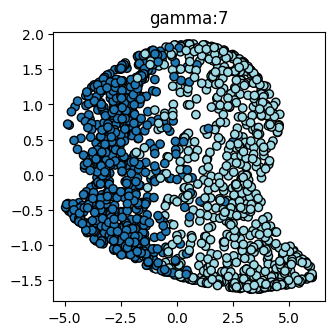

In [40]:
gamma = 7

from sklearn.metrics.pairwise import pairwise_kernels

from skmatter.preprocessing._data import KernelNormalizer

k = pairwise_kernels(
    X_train,
    metric="rbf",
    filter_params=True,
    gamma=gamma,
    
)
# k = KernelNormalizer().fit_transform(k)
fig, axis = plt.subplots(1, len(gamma_vals), figsize=(len(gamma_vals) * 3.5, 3.5))

kpcovc = PCovC(
    classifier=LinearSVC(loss="hinge"),
    n_components=n_components,
    random_state=random_state,
    mixing=0.1,
)
t_kpcovc = kpcovc.fit_transform(k, y_train)

axis.scatter(t_kpcovc[:, 0], t_kpcovc[:, 1], c=y_train)
axis.set_title(f"gamma:{gamma}")

    # axes[i].set_xticks([])
    # axes[i].set_yticks([])

fig.subplots_adjust(wspace=0.25)